#### Задание:

Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

Загрузите датасет в pandas DataFrame под названием df.

Выполните предварительную обработку данных, выполнив следующие шаги: 
* a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 
* b. Проверьте и обработайте любые дублирующиеся строки в датасете. 
* c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 
* a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 
* b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 
* c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 
* d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

Выполните проектирование признаков путем реализации следующих преобразований: 
* a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 
* b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

Импортируем библиотеки, которые могут нам понадобиться.

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import missingno as msno

Для получения полного датасета загружаем в pandas все 3 датасета для последующего формирования полного датасета.

In [105]:
df_first = pd.read_csv('train.csv')
df_sec = pd.read_csv('test.csv')
df_sec_prices = pd.read_csv('sample_submission.csv')

Датасет df_first содержит все клонки и первую половину строк.
Датасет df_sec содержит все колонки кроме цены и вторую половину строк.
Датасет df_sec_prices содержит колонки Id и SalePrice второй половины строк.

Для начала добавим в df_sec колонку с ценами что бы получить полную вторую половину датасета и возможность объединить две половины датасета.

In [106]:
df_second = df_sec.merge(df_sec_prices, how='left', on='Id')


df_decond - датасет со всеми колонками и второй половиной строк.

Проверим количество колонок колонок в первой и второй половине датасета:

In [107]:
print(f'Num of columns in df_first - {df_first.shape[1]}')
print(f'Num of columns in df_second - {df_second.shape[1]}')


Num of columns in df_first - 81
Num of columns in df_second - 81


Проверим соответствие всех названий колонок в первой и второй половине датасета:

In [108]:
print(f'Count of intersecttions in names of columns = {len(df_first.columns.intersection(df_second.columns))}')

Count of intersecttions in names of columns = 81


В связи с соответствием количества и названий колонок в обеих половинах датасета, можем провести объединение обеих половин.
Воспользуемся функцией merge():

(До обновления Pandas до версии 2.0 можно было использовать функцию append(), но в апреле 2023г она была исключена из Pandas)

In [109]:
df_full = df_first.merge(df_second, how="outer")

C:\Users\Allen\AppData\Local\Temp\ipykernel_26060\3683315081.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df_full = df_first.merge(df_second, how="outer")


Проверим количество строк и столбцов в объединенном датасете:

In [110]:
df_full.shape

(2919, 81)

Запишем полный датасет в csv файл (index=False указан для предотвращения добавления столбца "Unnamed" с дубликатом индексов)

In [111]:
df_full.to_csv("House_Prices_merged.csv", index=False)

Для дальнейшей работы с датасетом загрузим его полную версию в Pandas (последние 2 шага не являются необходимыми, но я их предпринял с целью предотвращения всех предыдущих шагов в случае потери проеланной работы)

In [153]:
df = pd.read_csv("House_Prices_merged.csv")

Проверим количество строк, столбцов в новом датасете и соответствие столбцов 

In [154]:
print(f'rows = {df.shape[0]}, columns = {df.shape[1]}')
print(f'differet columns with df_full - {df.columns.difference(df_full.columns)}')
print(f'differet columns with df_first - {df.columns.difference(df_first.columns)}')
print(f'differet columns with df_second - {df.columns.difference(df_second.columns)}')

rows = 2919, columns = 81
differet columns with df_full - Index([], dtype='object')
differet columns with df_first - Index([], dtype='object')
differet columns with df_second - Index([], dtype='object')


Выполните предварительную обработку данных, выполнив следующие шаги: 

* a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). 
* b. Проверьте и обработайте любые дублирующиеся строки в датасете. 
* c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Определим количество пропущенных значений в столбцах и процент пропущенных значений.

In [156]:
for i in df.columns:
    count_mis = df[i].isnull().sum()
    percent_mis = ((count_mis / len(df)) * 100).round(2)
    print(f'Null-cells in {i} = {count_mis} \t\tPercentage of missing in {i} - {percent_mis} %') 

Null-cells in Id = 0 		Percentage of missing in Id - 0.0 %
Null-cells in MSSubClass = 0 		Percentage of missing in MSSubClass - 0.0 %
Null-cells in MSZoning = 4 		Percentage of missing in MSZoning - 0.14 %
Null-cells in LotFrontage = 486 		Percentage of missing in LotFrontage - 16.65 %
Null-cells in LotArea = 0 		Percentage of missing in LotArea - 0.0 %
Null-cells in Street = 0 		Percentage of missing in Street - 0.0 %
Null-cells in Alley = 2721 		Percentage of missing in Alley - 93.22 %
Null-cells in LotShape = 0 		Percentage of missing in LotShape - 0.0 %
Null-cells in LandContour = 0 		Percentage of missing in LandContour - 0.0 %
Null-cells in Utilities = 2 		Percentage of missing in Utilities - 0.07 %
Null-cells in LotConfig = 0 		Percentage of missing in LotConfig - 0.0 %
Null-cells in LandSlope = 0 		Percentage of missing in LandSlope - 0.0 %
Null-cells in Neighborhood = 0 		Percentage of missing in Neighborhood - 0.0 %
Null-cells in Condition1 = 0 		Percentage of missing in Cond

Визуализируем заполненные/пропущенные значения.

<Axes: >

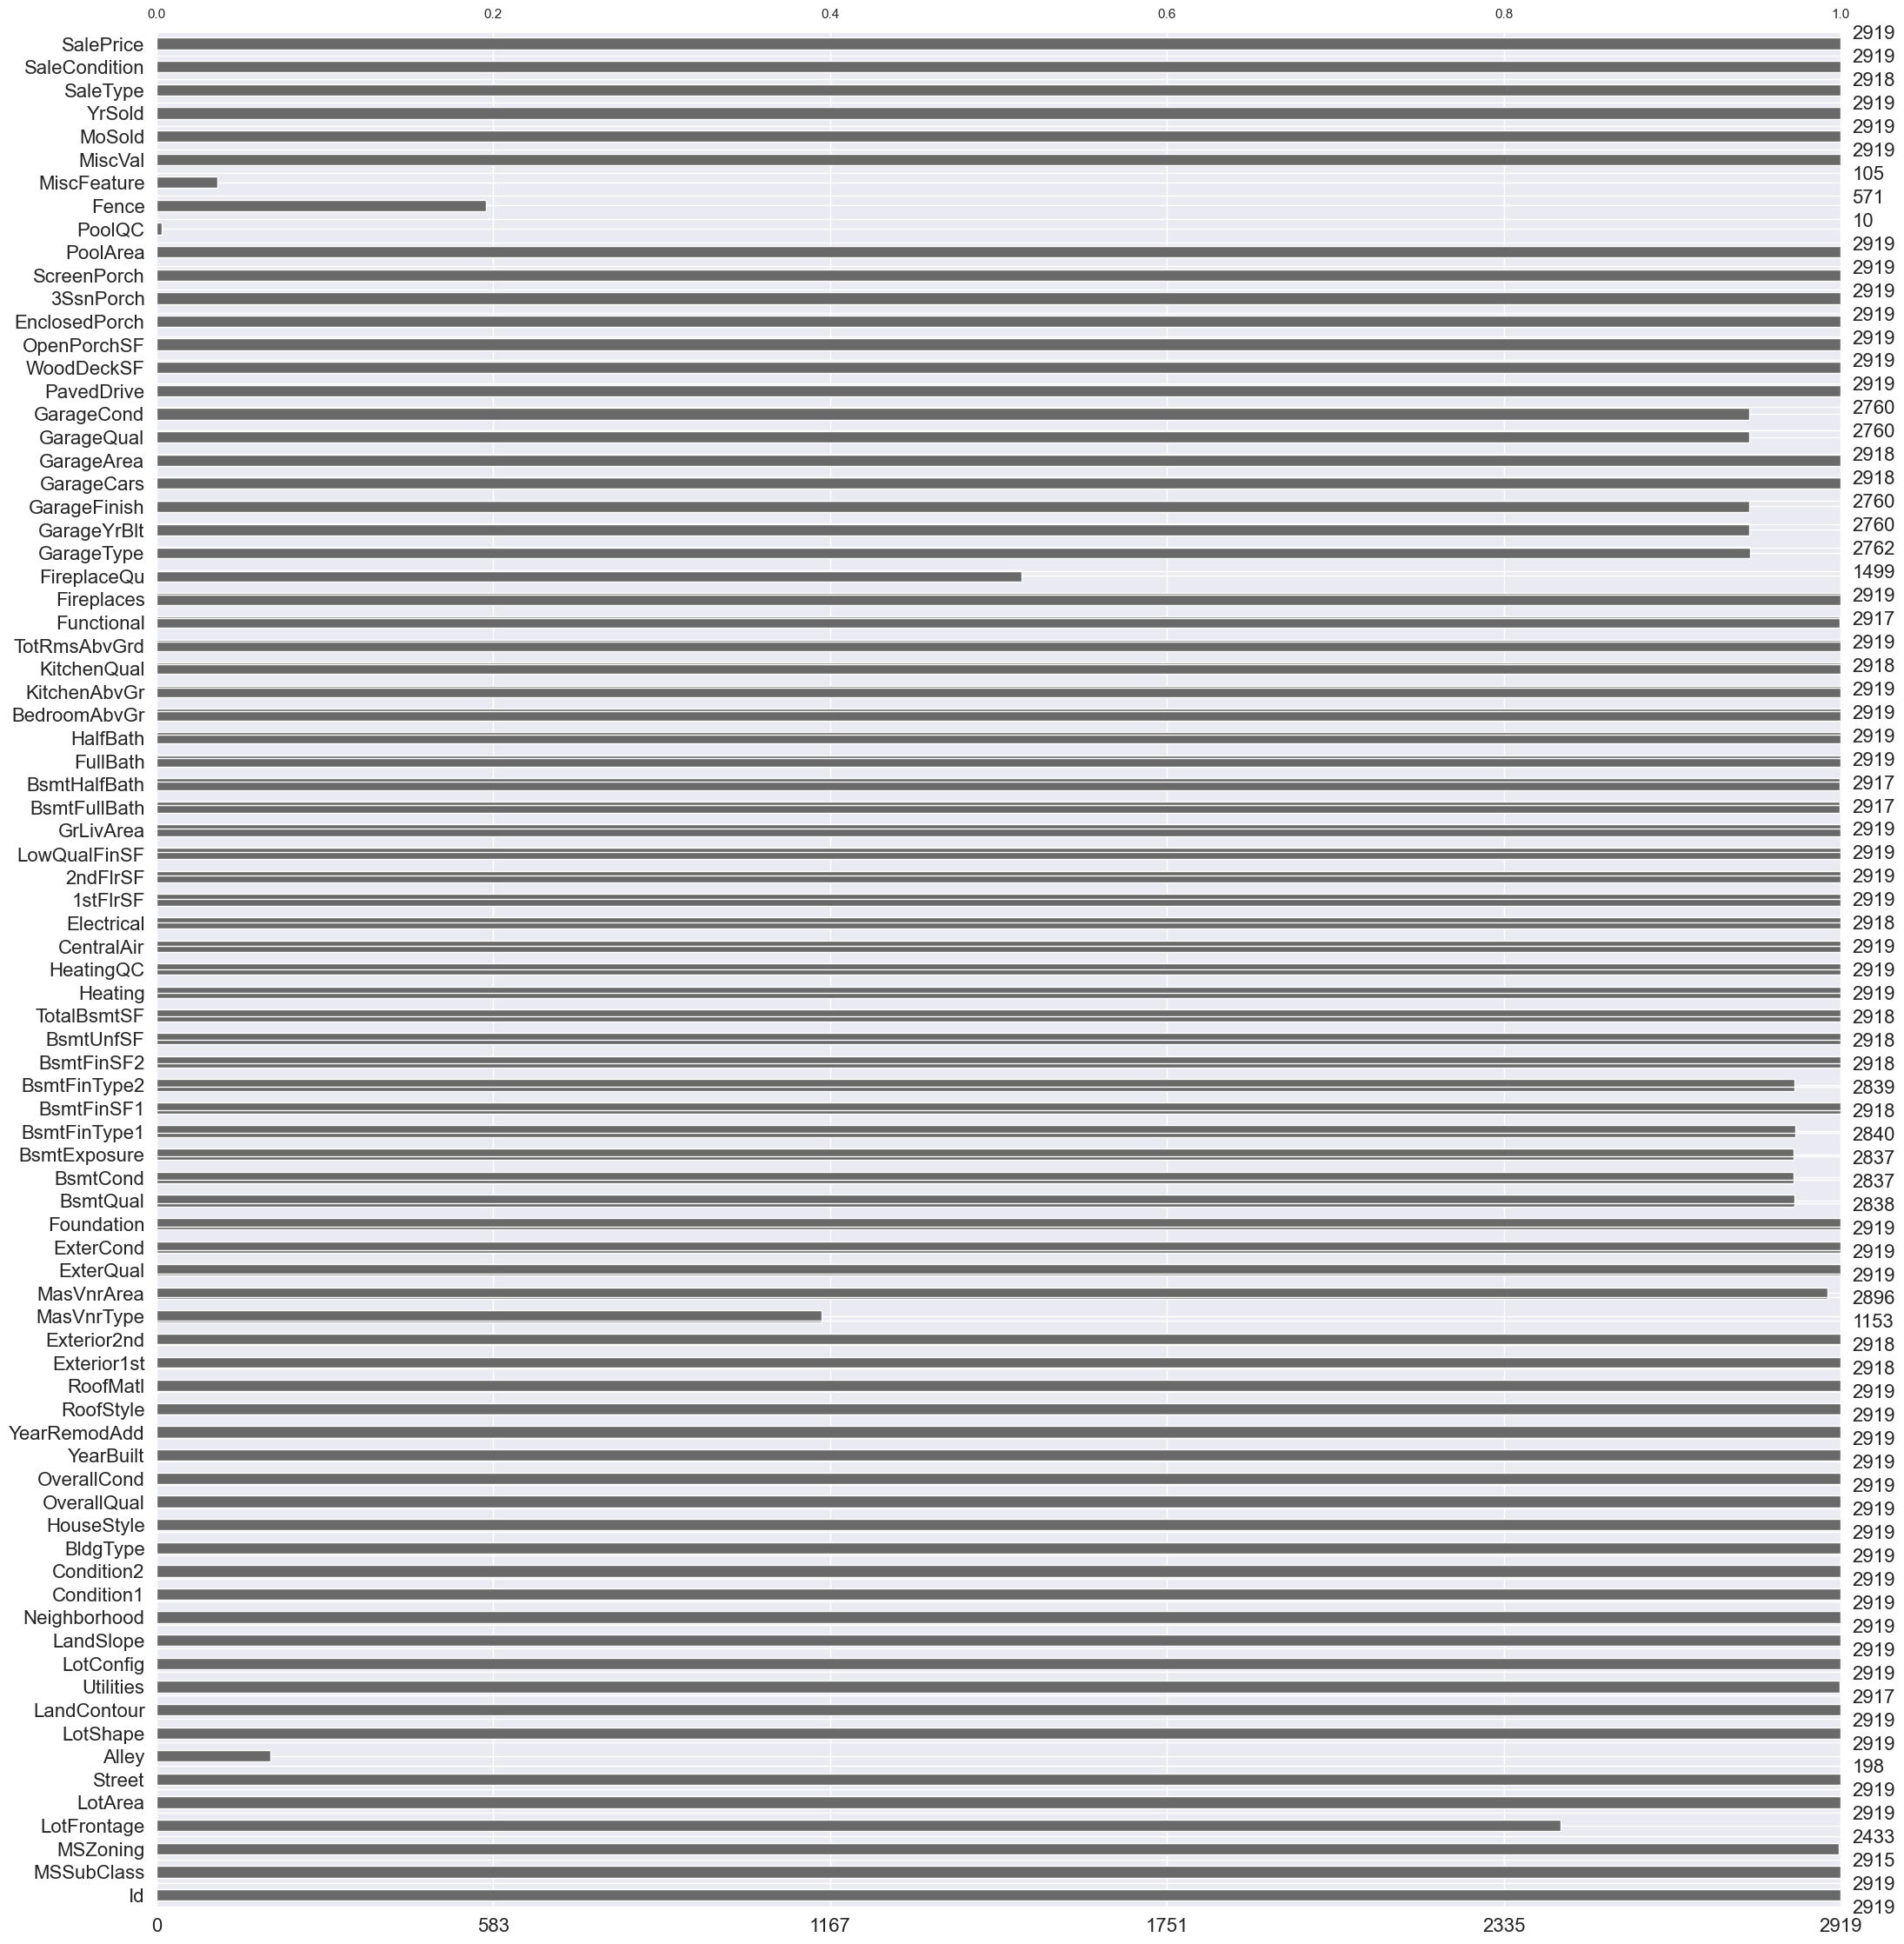

In [157]:
sns.set_theme()
msno.bar(df)

Выведем столбцы с большим количеством пропущенных значений и процентом пропущенных значений.

In [158]:
lot_abs = {}
for i in df.columns:
    count_mis = df[i].isnull().sum()
    percent_mis = ((count_mis / len(df)) * 100).round(2)
    if percent_mis > 50:
        lot_abs[i] = percent_mis
print(lot_abs)

{'Alley': 93.22, 'MasVnrType': 60.5, 'PoolQC': 99.66, 'Fence': 80.44, 'MiscFeature': 96.4}


В связи с очень высоким процентом пропущенных значений, определение корреляции между этими столбцами не может быть информативным. Поэтому данные столбцы целесообразно удалить.

In [159]:
abs_lst = [i for i in lot_abs.keys()]
df.drop(abs_lst, axis=1, inplace=True)

Проверяем, что столбцы удалены.

In [160]:
lot_abs = {}
for i in df.columns:
    count_mis = df[i].isnull().sum()
    percent_mis = ((count_mis / len(df)) * 100).round(2)
    if percent_mis > 50:
        lot_abs[i] = percent_mis
print(lot_abs)

{}


Определим остальные столбцы с пропущенными значениями и процентом пропусков.

In [161]:
col_abs = {}
for i in df.columns:
    count_mis = df[i].isnull().sum()
    percent_mis = ((count_mis / len(df)) * 100).round(2)
    if percent_mis > 0:
        col_abs[i] = percent_mis
for k, v in col_abs.items():
    print(f'{k} - {v} %')

MSZoning - 0.14 %
LotFrontage - 16.65 %
Utilities - 0.07 %
Exterior1st - 0.03 %
Exterior2nd - 0.03 %
MasVnrArea - 0.79 %
BsmtQual - 2.77 %
BsmtCond - 2.81 %
BsmtExposure - 2.81 %
BsmtFinType1 - 2.71 %
BsmtFinSF1 - 0.03 %
BsmtFinType2 - 2.74 %
BsmtFinSF2 - 0.03 %
BsmtUnfSF - 0.03 %
TotalBsmtSF - 0.03 %
Electrical - 0.03 %
BsmtFullBath - 0.07 %
BsmtHalfBath - 0.07 %
KitchenQual - 0.03 %
Functional - 0.07 %
FireplaceQu - 48.65 %
GarageType - 5.38 %
GarageYrBlt - 5.45 %
GarageFinish - 5.45 %
GarageCars - 0.03 %
GarageArea - 0.03 %
GarageQual - 5.45 %
GarageCond - 5.45 %
SaleType - 0.03 %


Посмотрим корреляцию по этим столбцам.

In [163]:
col_abs_lst = [i for i in col_abs.keys()]
df[col_abs_lst].isnull().corr()

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType
MSZoning,1.000000,0.008304,0.352947,-0.000686,-0.000686,-0.003301,0.162886,0.161842,0.161842,0.165033,...,0.352947,0.038060,-0.008832,-0.008891,-0.008891,-0.000686,-0.000686,-0.008891,-0.008891,-0.000686
LotFrontage,0.008304,1.000000,0.023442,-0.008274,-0.008274,0.022577,-0.002722,-0.003632,-0.003632,-0.000868,...,-0.011703,-0.111175,-0.061717,-0.062699,-0.062699,-0.008274,-0.008274,-0.062699,-0.062699,-0.008274
Utilities,0.352947,0.023442,1.000000,-0.000485,-0.000485,-0.002334,0.075284,0.074783,0.074783,0.076315,...,-0.000686,0.000709,-0.006243,-0.006285,-0.006285,-0.000485,-0.000485,-0.006285,-0.006285,-0.000485
Exterior1st,-0.000686,-0.008274,-0.000485,1.000000,1.000000,-0.001650,-0.003127,-0.003147,-0.003147,-0.003088,...,-0.000485,-0.018018,0.077646,0.077128,0.077128,-0.000343,-0.000343,0.077128,0.077128,-0.000343
Exterior2nd,-0.000686,-0.008274,-0.000485,1.000000,1.000000,-0.001650,-0.003127,-0.003147,-0.003147,-0.003088,...,-0.000485,-0.018018,0.077646,0.077128,0.077128,-0.000343,-0.000343,0.077128,0.077128,-0.000343
MasVnrArea,-0.003301,0.022577,-0.002334,-0.001650,-0.001650,1.000000,-0.015056,-0.015151,-0.015151,-0.014863,...,-0.002334,-0.016968,-0.004072,-0.004317,-0.004317,-0.001650,-0.001650,-0.004317,-0.004317,-0.001650
BsmtQual,0.162886,-0.002722,0.075284,-0.003127,-0.003127,-0.015056,1.000000,0.968463,0.968463,0.987229,...,0.075284,0.094292,0.089156,0.088116,0.088116,-0.003127,-0.003127,0.088116,0.088116,-0.003127
BsmtCond,0.161842,-0.003632,0.074783,-0.003147,-0.003147,-0.015151,0.968463,1.000000,0.962357,0.981018,...,0.074783,0.083417,0.088132,0.087095,0.087095,-0.003147,-0.003147,0.087095,0.087095,-0.003147
BsmtExposure,0.161842,-0.003632,0.074783,-0.003147,-0.003147,-0.015151,0.968463,0.962357,1.000000,0.981018,...,0.074783,0.087566,0.088132,0.087095,0.087095,-0.003147,-0.003147,0.087095,0.087095,-0.003147
BsmtFinType1,0.165033,-0.000868,0.076315,-0.003088,-0.003088,-0.014863,0.987229,0.981018,0.981018,1.000000,...,0.076315,0.091106,0.091253,0.090206,0.090206,-0.003088,-0.003088,0.090206,0.090206,-0.003088


Визуализируем корреляцию.

c:\Users\Allen\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

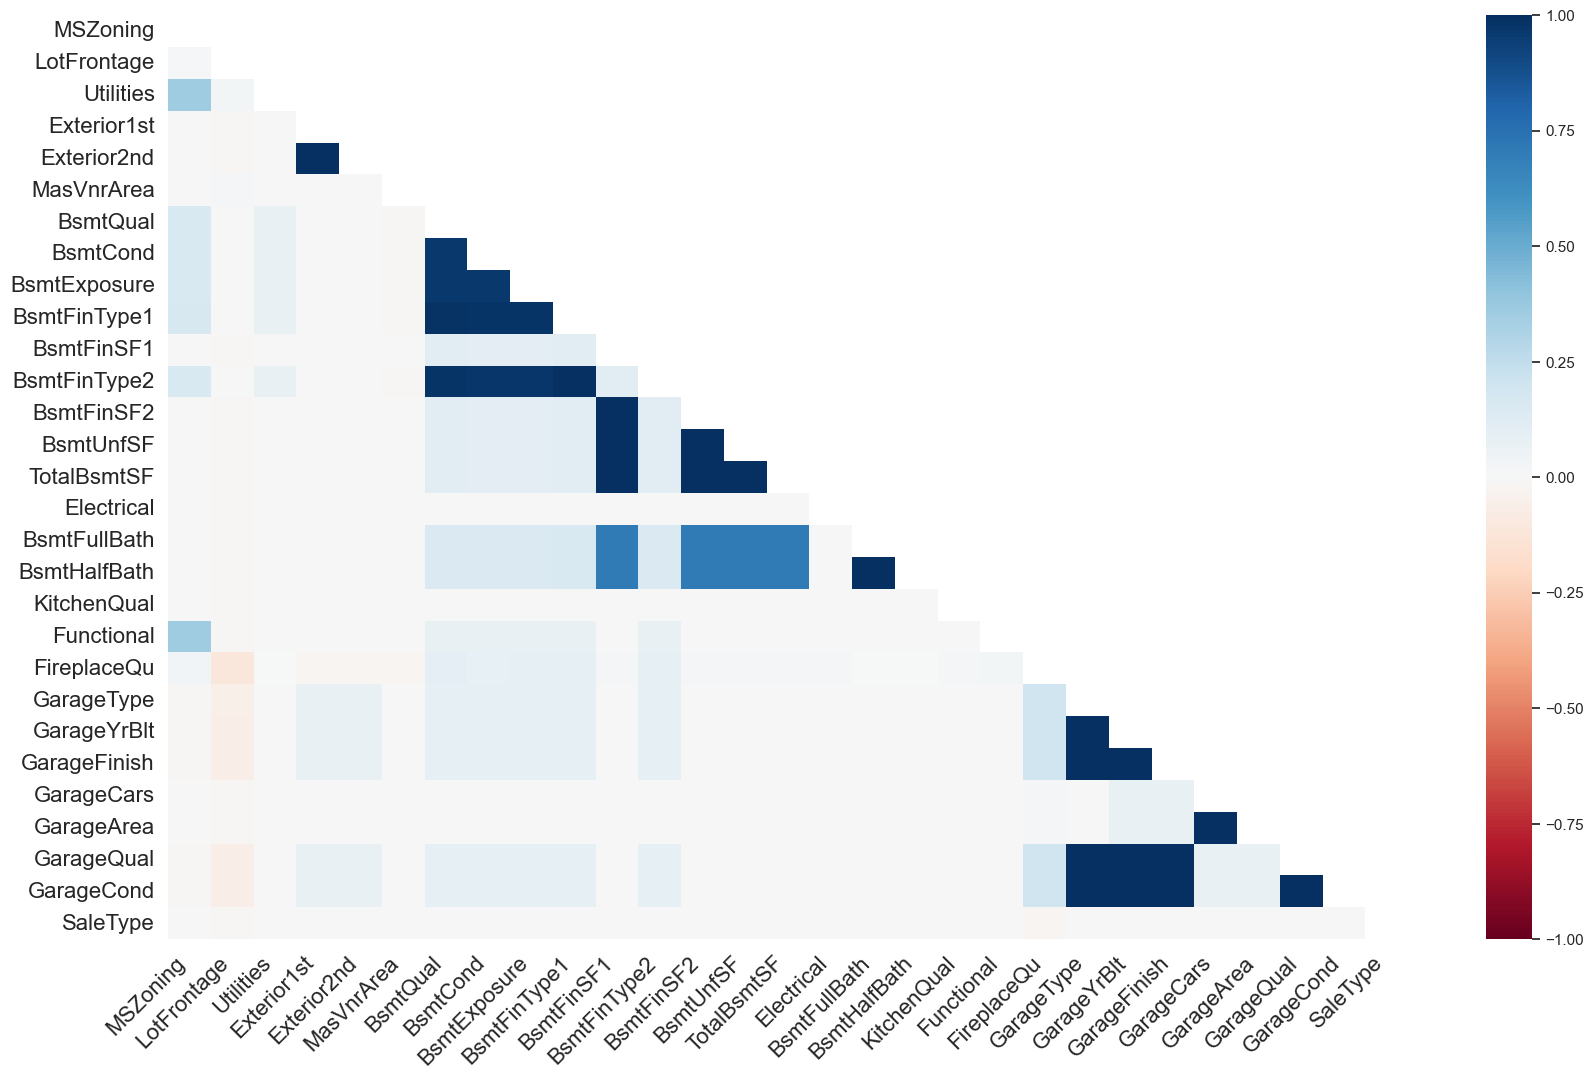

In [164]:
msno.heatmap(df)

Ввиду небольшого количества пропущенных значений в остальных столбцах, за исключением "FireplaceQu", который не имеет статистически значимой корреляции с остальными столбцами, заполним пропуски в столбцах с числовыми значениями средним значением по столбцу, а в столбцах с нечисловыми значениями - наиболее часто встречающимся значением (модой).


In [165]:
numeric_columns = df.select_dtypes(include=[np.number])
df[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

In [166]:
non_numeric_columns = df.select_dtypes(include=['object'])
df[non_numeric_columns.columns] = non_numeric_columns.fillna(non_numeric_columns.mode().iloc[0])

Проверим наличие отсутствующих значений.

In [167]:
missings = []
for i in df.columns:
    count_mis = df[i].isnull().sum()
    if count_mis > 0:
        missings.append(i)
if len(missings) == 0:
    print(f'Only Not-null cells in Dataframe')
else:
    print(missings)

Only Not-null cells in Dataframe


В исходных датасетах имелось различие в типх данных в столбце "SalePrice", однако после объединения датасетов этот столбец был автоматически преобразован к типу "float64". 
Проверим.

In [175]:
print(np.dtype(df['SalePrice']))

float64


Проведем поиск дубликатов.

In [168]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]


Дубликатов не обнаружено.

Возможность преобразования типов данных в используемом фреймворке существует, однако, необходимость преобразования типов данных зависит от конкретных условий (задачи и поставленных целей, необходимости обезличить или скрыть данные и прочее). 
В данном случае я не вижу необходимости проведения преобразования типов данных.